# Homework I: Predicting Home Prices 

The [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) was introduced by Professor Dean De Cock in 2011 for use in data science education. It contains 2,919 observations of housing sales in Ames, Iowa between 2006 and 2010. There are a total of 79 features describing each house's size, quality, area, age, and other miscellaneous attributes. 

From Kaggle:

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

Please follow the instructions in this notebook and prepare the data for home price prediction. **Submit your solutions as a PDF file to Blackboard by Wednesday, March 2nd at 11:59PM.**

## 1. Overall Understanding of the Data
In this section, you will need to complete the following tasks:
- Load the dataset as a pandas data frame.
- Display key information of the data.
- Handle missing values.

1.1 In the cell below, import the `pandas` library and load file `train.csv` from the Ames housing dataset as a data frame.

In [3]:
import pandas as pd

df = pd.read_csv('train.csv')

1.2 Display the first 5 rows of the data frame.

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1.3 Display the shape of the data frame and list all column names.

In [37]:
print("Shape:", df.shape)

df.columns

Shape: (1460, 62)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

1.4 Display the number of missing values in each column.

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

1.5 Remove all the columns that contain missing values.

In [7]:
df = df.dropna(axis='columns')

In [8]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


## 2. Study Key Features

The total number of features seems overwhelming, so let's start with a few features that we know are definitely relevant:
1. `OverallQual`: Overall material and finish quality
2. `YearBuilt`: Original construction date
3. `TotalBsmtSF`: Total basement area in square feet
4. `GrLivArea`: Above ground living area in square feet

and don't forget `SalePrice`.

For each of these 5 features, please find:
- Descriptive statistics
- Graphical representation of their distribution
- Check for outliers
- Study correlations

2.1 **Descriptive statistics**: For each of the 5 features, find its minimum, maximum, mean, and standard deviation.

In [9]:
df[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']].describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1515.463699,180921.195890
std,1.382997,30.202904,438.705324,525.480383,79442.502883
min,1.000000,1872.000000,0.000000,334.000000,34900.000000
25%,5.000000,1954.000000,795.750000,1129.500000,129975.000000
50%,6.000000,1973.000000,991.500000,1464.000000,163000.000000
75%,7.000000,2000.000000,1298.250000,1776.750000,214000.000000
max,10.000000,2010.000000,6110.000000,5642.000000,755000.000000


2.2 **Distribution**: For each of the 5 features, generate a histogram. Choose the number of bins properly.

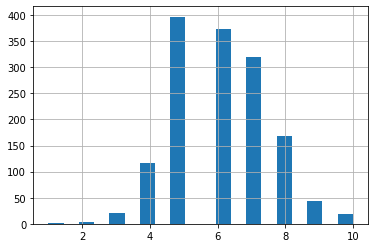

In [10]:
df['OverallQual'].hist(bins = 20)

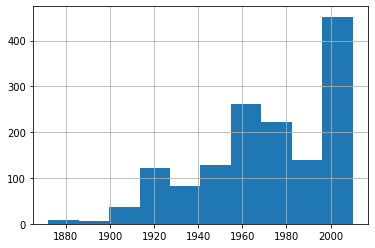

In [11]:
df['YearBuilt'].hist()

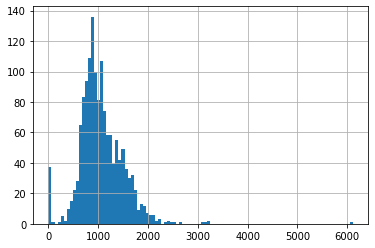

In [12]:
df['TotalBsmtSF'].hist(bins = 100)

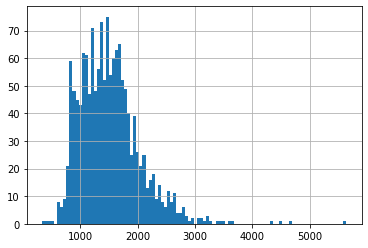

In [13]:
df['GrLivArea'].hist(bins = 100)

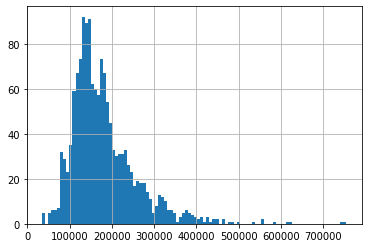

In [14]:
df['SalePrice'].hist(bins = 100)

2.3 **Outliers**: An **outlier** is a value that is located far away from the vast majority of the data. Remove those rows that contain outliers.

In [15]:
# Need to find best way to do this
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


2.4 **Correlation with sale price**: For each of the 4 chosen predictive features, draw a scatter plot of this feature and `SalePrice`. Set the title, axis label of the graph properly.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

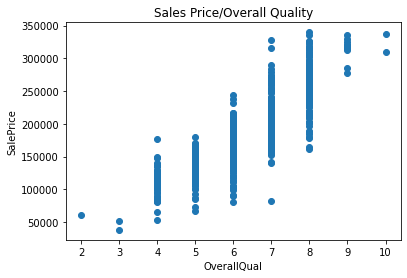

In [17]:
plt.scatter(df_out['OverallQual'],df_out['SalePrice'])
plt.title("Sales Price/Overall Quality")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

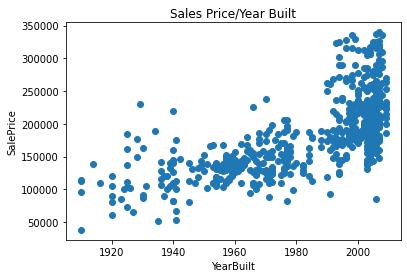

In [18]:
plt.scatter(df_out['YearBuilt'],df_out['SalePrice'])
plt.title("Sales Price/Year Built")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

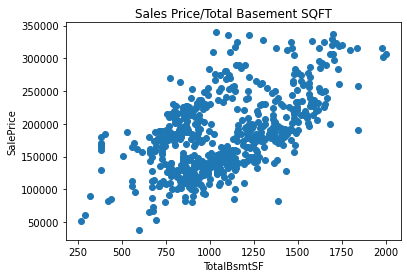

In [19]:
plt.scatter(df_out['TotalBsmtSF'],df_out['SalePrice'])
plt.title("Sales Price/Total Basement SQFT")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

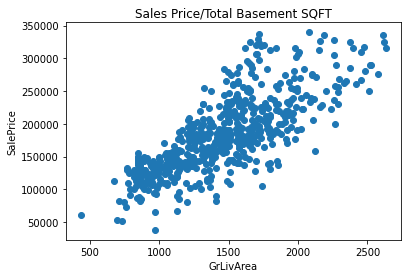

In [20]:
plt.scatter(df_out['GrLivArea'],df_out['SalePrice'])
plt.title("Sales Price/Total Basement SQFT")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Describe the correlation between each predictive feature and `SalePrice`. Is there a positive correclation, a negative correlation, or no correlation?

In [21]:
df_out[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']].corr()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
OverallQual,1.000000,0.672065,0.491408,0.662874,0.841090
YearBuilt,0.672065,1.000000,0.413285,0.407915,0.677442
TotalBsmtSF,0.491408,0.413285,1.000000,0.268436,0.576487
GrLivArea,0.662874,0.407915,0.268436,1.000000,0.772132
SalePrice,0.841090,0.677442,0.576487,0.772132,1.000000


## 3. Identify Additional Predictive Feature
Let’s find out if other features are helpful to the price prediction. Additional features can be identified in the following ways:
- Calculate correlation coefficient between `SalePrice` and an existing feature.
- Create new features from existing features.

3.1 Calculate the correlation coefficient of each feature with `SalePrice` (excluding `SalePrice` itself). Identify the feature (other than the 4 features studied in the previous section) that has the strongest correlation with the sale prices.

In [22]:
#finding correlation for features not including 'OverallQual','YearBuilt','TotalBsmtSF','GrLivArea'

df_out.corr()['SalePrice'].sort_values(ascending=False).drop(['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea'])

SalePrice        1.000000
GarageCars       0.719309
GarageArea       0.703012
FullBath         0.671137
YearRemodAdd     0.595790
TotRmsAbvGrd     0.583123
1stFlrSF         0.533746
OpenPorchSF      0.407853
Fireplaces       0.389852
2ndFlrSF         0.366058
WoodDeckSF       0.345703
LotArea          0.333735
HalfBath         0.293952
BsmtFinSF1       0.243154
BedroomAbvGr     0.224650
BsmtFullBath     0.221886
BsmtUnfSF        0.178867
MSSubClass       0.151670
MoSold           0.075577
YrSold           0.017785
Id              -0.024665
OverallCond     -0.352801
BsmtFinSF2            NaN
LowQualFinSF          NaN
BsmtHalfBath          NaN
KitchenAbvGr          NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
Name: SalePrice, dtype: float64

3.2 **Feature engineering**: Based on our experience, the total area of the house and the average area per room should also be important factors in determining the price. Please create these two columns using the following formula:

1. total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)
2. area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).


In [23]:
df_out['TotalArea'] = df_out['GrLivArea'] + df_out['TotalBsmtSF']
df_out['areaPerRoom'] = df_out['GrLivArea'] / df_out['TotRmsAbvGrd']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Up to this point, you should have obtained 7 features that are helpful to predict the sale price: `OverallQual`, `YearBuilt`, `TotalBasmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and a feature selected in 3.1. Create a new data frame with `SalePrice` and these 7 features only. Save the data as a CSV file named `HousingData_processed.csv` on your computer.

In [24]:
data = df_out[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','TotalArea','areaPerRoom','GarageCars']]

In [25]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,areaPerRoom,GarageCars
0,7,2003,856,1710,2566,213.750000,2
2,7,2001,920,1786,2706,297.666667,2
4,8,2000,1145,2198,3343,244.222222,3
6,8,2004,1686,1694,3380,242.000000,2
10,5,1965,1040,1040,2080,208.000000,1


## 4. Calculate Feature Statistics

Let's apply the **k-nearest-neighbor method** to this dataset and estimate the price of a house in the test set:

- OverallQual: 5
- YearBuilt: 1961
- TotalBsmtSF: 882
- GrLivArea: 896

Additional information about this house is on the first row of `test.csv`. The ID of this house in the data set is 1461.

The core idea of the k-nearest-neighbor method is to find existing houses that are most similar to the house with unknown price. Since similar houses should be priced similarly, their average price can be used as a good estimate on the price of the new house.

In order to conduct this estimation, we need to normalize the columns using the mean value and the standard deviation of each of the seven predictive features. These features include `OverallQual`, `YearBuilt`, `TotalBsmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and the feature you selected using correlation coefficient.

Transform each column with the following formula:
$$ \textit{normalized value} = \frac{\textit{original value} - mean}{\textit{standard deviation}}$$

In [26]:
data = (data - data.mean())/data.std()

## 5. Measure Difference

For each house in the data frame, measure its difference to the target house by summing up the squared difference on each predictive feature. Write this value in a new column named `Diff`.

Display the difference for the first 5 houses below:

In [27]:
df1 = pd.read_csv('test.csv')

df1['TotalArea'] = df1['GrLivArea'] + df1['TotalBsmtSF']
df1['areaPerRoom'] = df1['GrLivArea'] / df1['TotRmsAbvGrd']

test_data = df1[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','TotalArea','areaPerRoom','GarageCars']]

In [28]:
test_data

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,areaPerRoom,GarageCars
0,5,1961,882.0,896,1778.0,179.200000,1.0
1,6,1958,1329.0,1329,2658.0,221.500000,1.0
2,5,1997,928.0,1629,2557.0,271.500000,2.0
3,6,1998,926.0,1604,2530.0,229.142857,2.0
4,8,1992,1280.0,1280,2560.0,256.000000,2.0
...,...,...,...,...,...,...,...
1454,4,1970,546.0,1092,1638.0,218.400000,0.0
1455,4,1970,546.0,1092,1638.0,182.000000,1.0
1456,5,1960,1224.0,1224,2448.0,174.857143,2.0
1457,5,1992,912.0,970,1882.0,161.666667,0.0


In [29]:
"""
OverallQual: 5
YearBuilt: 1961
TotalBsmtSF: 882
GrLivArea: 896
"""

# some rows in test_data had null values

#test_data.isnull().sum()

# I replaced the null values with the mean of each column

test_data.fillna(df.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,areaPerRoom,GarageCars
0,5,1961,882.0,896,1778.0,179.200000,1.0
1,6,1958,1329.0,1329,2658.0,221.500000,1.0
2,5,1997,928.0,1629,2557.0,271.500000,2.0
3,6,1998,926.0,1604,2530.0,229.142857,2.0
4,8,1992,1280.0,1280,2560.0,256.000000,2.0
...,...,...,...,...,...,...,...
1454,4,1970,546.0,1092,1638.0,218.400000,0.0
1455,4,1970,546.0,1092,1638.0,182.000000,1.0
1456,5,1960,1224.0,1224,2448.0,174.857143,2.0
1457,5,1992,912.0,970,1882.0,161.666667,0.0


In [30]:
np.array(test_data)[0]
A = np.array(test_data)[0]

B = np.array(data)

Diff = pow(abs(B - A),2).sum(axis=1)

In [31]:
data['Diff'] = Diff

In [32]:
data['Diff'].head(5)

0     8.616617e+06
2     8.614570e+06
4     8.608178e+06
6     8.606483e+06
10    8.627614e+06
Name: Diff, dtype: float64

## 6. Find Nearest Neighbors

Find 5 houses that are the most similar to the target house.

List their prices below.

In [33]:
k =5

sorted_data = data.sort_values(by='Diff', ascending=True)
  
target_index = []
 
# make a list of the k neighbors' targets
for i in range(k): # k
  index = sorted_data.index[i]
  target_index.append(index)



In [34]:
target_index

[261, 423, 305, 1359, 1105]

## 7. Make Predictions

The prediction on the price of the new house is the average price of the 5 houses listed above. Display the predicted price below.

In [35]:
df.loc[target_index][['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','SalePrice']]

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
261,8,2007,1482,2574,276000
423,8,1998,1470,2630,315000
305,8,2004,2000,2000,305900
1359,9,2004,1980,1980,315000
1105,8,1994,1463,2622,325000
